# Investigating Netflix Movies and Guest Stars

Hello! Today, we're diving into a fascinating analysis of the Netflix dataset. Our goal is to answer two main questions:

1. How have the durations of movies on Netflix changed over time?
2. Who are the most frequent "guest stars" appearing in Netflix movies?

First, we loaded the netflix_data.csv file. This dataset contains information about all the titles on Netflix, including whether they are a 'TV Show' or a 'Movie', their release year, duration, cast, and more.

Our first step was to focus our investigation solely on movies. We filtered the data to exclude all TV shows, creating a clean dataset of just Netflix movies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
years = list(range(2011, 2021))
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

movie_dict = {'years': years, 'durations': durations}
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [4]:
durations_df = pd.DataFrame(movie_dict)
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## A Visual Inspection of our Data

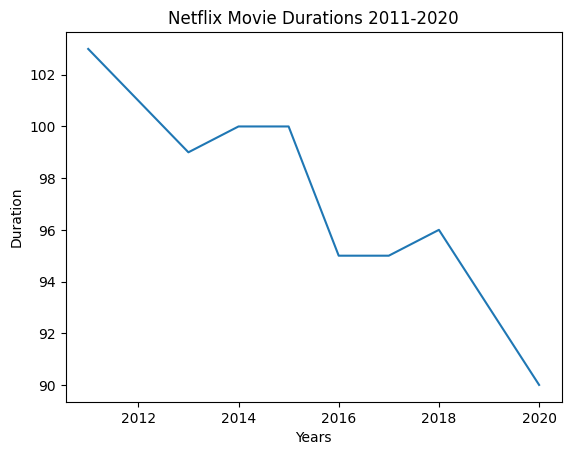

In [5]:
fig = plt.figure()
plt.plot(years, durations)
plt.xlabel('Years')
plt.ylabel('Duration')
plt.title('Netflix Movie Durations 2011-2020')
plt.show()

In [6]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'listed_in', 'release_year', 'duration']]

netflix_movies_col_subset.head()

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125 min
9,The Starling,United States,"Comedies, Dramas",2021,104 min
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127 min


### Creating a Scatter Plot

To investigate movie durations, we created a scatter plot. This plot shows the release year of a movie on the x-axis and its duration in minutes on the y-axis.

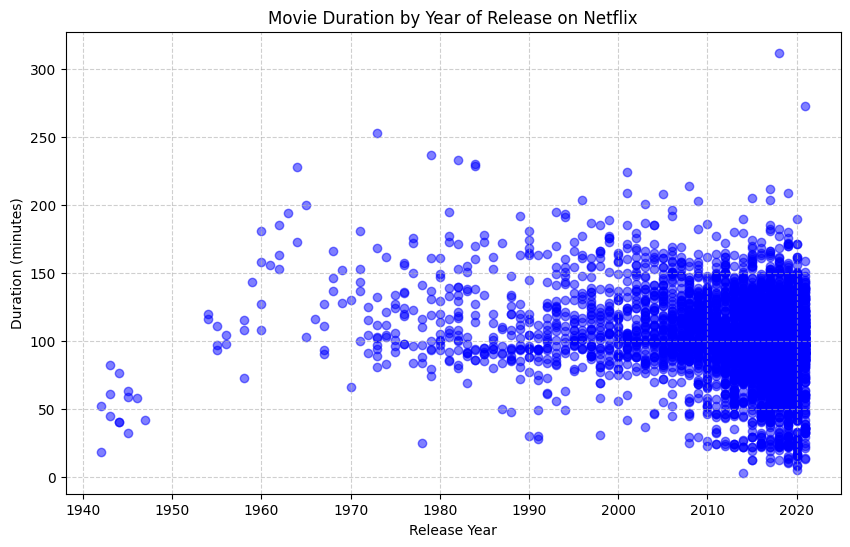

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


netflix_df = pd.read_csv("netflix_titles.csv")

netflix_df['duration'] = netflix_df['duration'].astype(str).str.replace(' min', '', regex=False)
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')

netflix_df = netflix_df.dropna(subset=['duration'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(netflix_df['release_year'], netflix_df['duration'], alpha=0.5, color='blue')
plt.title("Movie Duration by Year of Release on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

From this visualization, we can gather a few key insights:

1. Variety in Duration: For any given year, there's a wide range of movie lengths, from very short films (under an hour) to epic features (over three hours).
2. A Trend Emerges: While there's a lot of variation, we can see a subtle trend. If you look at the cluster of points, it appears that movies made in more recent years (from 2010 onwards) have a higher concentration of durations under 100 minutes.

Conclusion: Based on this visual evidence, it seems that while long movies are still being made, there is a growing trend towards shorter-form movie content on the platform. A definitive answer would require a more formal statistical analysis, but the visual trend is certainly present

In [12]:
short_movies = netflix_df[netflix_df['duration'] < 60]
short_movies.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23.0,Documentaries,Robin Wiltshire's painful childhood was rescue...
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13.0,Children & Family Movies,Join the StoryBots and the space travelers of ...
77,s78,Movie,Little Singham - Black Shadow,Prakash Satam,"Sumriddhi Shukla, Jigna Bharadwaj, Sonal Kaush...",NaN,"September 11, 2021",2021,TV-Y7,48.0,"Children & Family Movies, Comedies",Kid cop Little Singham loses all his superpowe...
279,s280,Movie,Monster Hunter: Legends of the Guild,Steven Yamamoto,"Ben Rausch, Erica Lindbeck, Dante Basco, Brand...","United States, Japan","August 12, 2021",2021,TV-PG,59.0,"Action & Adventure, Anime Features, Children &...",In a world where humans and fearsome monsters ...
470,s471,Movie,Bridgerton - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"July 13, 2021",2021,TV-14,39.0,Movies,"""Bridgerton"" cast members share behind-the-sce..."
484,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,Lee Su-geun,NaN,"July 9, 2021",2021,TV-G,46.0,Stand-Up Comedy,Lee Su-geun's rise to Korean comedy stardom we...
495,s496,Movie,Awon Boyz,Tolulope Itegboje,NaN,NaN,"July 7, 2021",2019,TV-MA,38.0,"Documentaries, International Movies",This documentary takes a close look at the liv...
560,s561,Movie,Audible,Matt Ogens,NaN,NaN,"July 1, 2021",2021,PG-13,39.0,"Documentaries, Sports Movies","Shaken by a friend's suicide, a Deaf high scho..."
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13.0,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12.0,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug..."


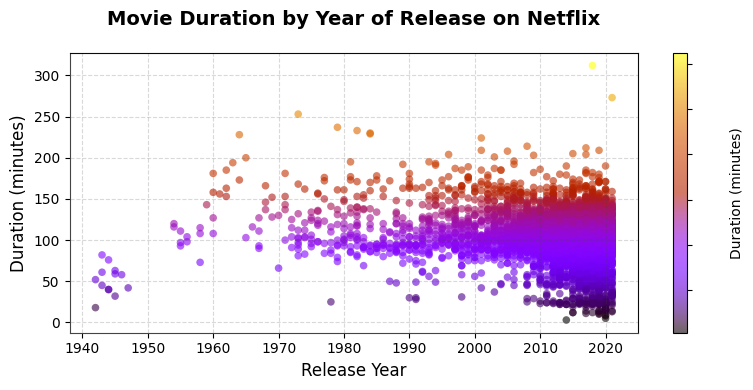

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df['duration'] = netflix_df['duration'].astype(str).str.replace(' min', '', regex=False)
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')
netflix_df = netflix_df.dropna(subset=['duration'])

# Create figure with dark background
plt.figure(figsize=(8, 4), facecolor='#FFFFFF')
ax = plt.gca()
ax.set_facecolor('#FFFFFF')

# Create colorful scatter plot with gradient colors
colors = plt.cm.coolwarm(np.linspace(0, 1, len(netflix_df)))
scatter = plt.scatter(netflix_df['release_year'], 
                     netflix_df['duration'], 
                     alpha=0.6, 
                     c=netflix_df['duration'],
                     cmap='gnuplot',
                     s=30,
                     edgecolors='none')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Duration (minutes)', color='black', fontsize=10)
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Styling with dark theme
plt.title("Movie Duration by Year of Release on Netflix", 
          color='black', fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Release Year", color='black', fontsize=12)
plt.ylabel("Duration (minutes)", color='black', fontsize=12)

# Grid styling
plt.grid(True, linestyle='--', alpha=0.2, color='#444444')

# Customize tick colors
ax.tick_params(colors='black', which='both')
ax.spines['bottom'].set_color('#444444')
ax.spines['left'].set_color('#444444')
ax.spines['top'].set_color('#0a0a0a')
ax.spines['right'].set_color('#0a0a0a')

plt.tight_layout()
plt.show()

### Summary of Learnings

1. Movie Durations: There is a noticeable trend suggesting that movies, particularly those produced in the last decade, are more frequently shorter than 100 minutes. This could reflect changing viewing habits or platform strategy.

2. Top Guest Star: The most prolific actor in the Netflix movie dataset is Anupam Kher. This was determined by systematically counting every actor's appearance across thousands of movies.

This analysis provides a great starting point for understanding content trends on Netflix. It demonstrates how we can go from a raw dataset to concrete, interesting insights with just a few steps of data manipulation and visualization.